# Merging Multiple Air Quality Datasets into a Single CSV

**Import Required Libraries**

In [10]:
import tkinter as tk
from tkinter import ttk, filedialog
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import numpy as np
import os


**Define Data Folder Path**

In [11]:
# Path to the folder containing datasets
data_folder = "/content/Data"


**List Files in the Folder**

In [12]:
# List all files in the folder
file_names = os.listdir(data_folder)

# Display the file names for confirmation
print("Files in the folder:", file_names)


Files in the folder: ['PRSA_Data_Wanliu_20130301-20170228.csv', 'PRSA_Data_Dongsi_20130301-20170228.csv', 'PRSA_Data_Shunyi.csv', 'PRSA_Data_Guanyuan.csv', 'PRSA_Data_Wanshouxigong.csv', 'PRSA_Data_Tiantan.csv', 'PRSA_Data_Dingling.csv']


**Load and Merge Datasets**

In [13]:
# Load all datasets and concatenate them
dataframes = []

for file_name in file_names:
    file_path = os.path.join(data_folder, file_name)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Merge all dataframes into one
merged_data = pd.concat(dataframes, ignore_index=True)


**Save the Merged Data**

In [14]:
# Save the merged data to a CSV file for later use
merged_data.to_csv("merged_air_data.csv", index=False)

# Confirm the data has been saved
print("Merged data saved to 'merged_air_data.csv'")


Merged data saved to 'merged_air_data.csv'


# Analyzing the Combined Air Quality Dataset

**Load the Merged Data**

In [15]:
# Load merged data
data = pd.read_csv("merged_air_data.csv")

# Overview of the dataset
print("Shape of the dataset:", data.shape)
print("Columns in the dataset:", data.columns)


Shape of the dataset: (245448, 18)
Columns in the dataset: Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')


In [16]:
# Display the first few rows of the dataset
print("Sample data:\n", data.head())


Sample data:
    No  year  month  day  hour  PM2.5  PM10  SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    8.0   8.0  6.0  28.0  400.0  52.0  -0.7   
1   2  2013      3    1     1    9.0   9.0  6.0  28.0  400.0  50.0  -1.1   
2   3  2013      3    1     2    3.0   6.0  NaN  19.0  400.0  55.0  -1.1   
3   4  2013      3    1     3   11.0  30.0  8.0  14.0    NaN   NaN  -1.4   
4   5  2013      3    1     4    3.0  13.0  9.0   NaN  300.0  54.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM station  
0  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  1023.2 -18.2   0.0    N   4.7  Wanliu  
2  1023.5 -18.2   0.0  NNW   5.6  Wanliu  
3  1024.5 -19.4   0.0   NW   3.1  Wanliu  
4  1025.2 -19.5   0.0    N   2.0  Wanliu  


 Check for Missing Values


In [17]:
# Check for missing values in each column
missing_values = data.isnull().sum()

# Display missing values
print("Missing values:\n", missing_values)


Missing values:
 No             0
year           0
month          0
day            0
hour           0
PM2.5       4813
PM10        3551
SO2         5525
NO2         7427
CO         13375
O3          8568
TEMP         203
PRES         200
DEWP         206
RAIN         201
wd          1062
WSPM         156
station        0
dtype: int64


# Data Cleaning and Preprocessing for Air Quality Dataset

**Handle Missing Values**

In [18]:
# Drop rows with missing values (or consider using imputation strategies if required)
data = data.dropna()

# Confirm the missing values are handled
print("Missing values after cleaning:\n", data.isnull().sum())


Missing values after cleaning:
 No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64


**Remove Duplicate Rows**

In [19]:
# Remove duplicate rows from the dataset
data = data.drop_duplicates()

# Confirm duplicates are removed
print("Shape after removing duplicates:", data.shape)


Shape after removing duplicates: (220346, 18)


Ensure Correct Data Types

In [20]:
# Convert 'year' column to datetime format (if it exists)
if 'year' in data.columns:
    data['year'] = pd.to_datetime(data['year'], errors='coerce')

# Confirm data type conversion
print("Data types after conversion:\n", data.dtypes)


Data types after conversion:
 No                  int64
year       datetime64[ns]
month               int64
day                 int64
hour                int64
PM2.5             float64
PM10              float64
SO2               float64
NO2               float64
CO                float64
O3                float64
TEMP              float64
PRES              float64
DEWP              float64
RAIN              float64
wd                 object
WSPM              float64
station            object
dtype: object


**Feature Engineering**

In [21]:
# Example: Extract 'hour' and 'month' from the 'year' column (if it exists and is a datetime column)
if 'year' in data.columns and pd.api.types.is_datetime64_any_dtype(data['year']):
    data['hour'] = data['year'].dt.hour
    data['month'] = data['year'].dt.month

# Preview the new columns
print("Sample data after feature engineering:\n", data.head())


Sample data after feature engineering:
    No                          year  month  day  hour  PM2.5  PM10   SO2  \
0   1 1970-01-01 00:00:00.000002013      1    1     0    8.0   8.0   6.0   
1   2 1970-01-01 00:00:00.000002013      1    1     0    9.0   9.0   6.0   
5   6 1970-01-01 00:00:00.000002013      1    1     0    3.0   6.0   8.0   
6   7 1970-01-01 00:00:00.000002013      1    1     0    3.0   3.0  10.0   
7   8 1970-01-01 00:00:00.000002013      1    1     0    3.0   6.0  11.0   

    NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  WSPM station  
0  28.0  400.0  52.0  -0.7  1023.0 -18.8   0.0  NNW   4.4  Wanliu  
1  28.0  400.0  50.0  -1.1  1023.2 -18.2   0.0    N   4.7  Wanliu  
5  17.0  300.0  54.0  -2.2  1025.6 -19.6   0.0    N   3.7  Wanliu  
6  21.0  300.0  52.0  -2.6  1026.5 -19.1   0.0  NNE   2.5  Wanliu  
7  26.0  300.0  47.0  -1.6  1027.4 -19.1   0.0  NNW   3.8  Wanliu  


**Save Cleaned Data**

In [22]:
# Save the cleaned dataset to a new CSV file
data.to_csv("Processed_air_data.csv", index=False)

# Confirm the cleaned data has been saved
print("Cleaned data saved to 'Processed_air_data.csv'")


Cleaned data saved to 'Processed_air_data.csv'


# Statistical Summary of the Air Quality Dataset

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary
print(data.describe())

                  No                           year     month            day  \
count  220346.000000                         220346  220346.0  220346.000000   
mean    18038.522837  1970-01-01 00:00:00.000002014       1.0      15.739237   
min         1.000000  1970-01-01 00:00:00.000002013       1.0       1.000000   
25%      9812.000000  1970-01-01 00:00:00.000002014       1.0       8.000000   
50%     18223.000000  1970-01-01 00:00:00.000002015       1.0      16.000000   
75%     26523.000000  1970-01-01 00:00:00.000002016       1.0      23.000000   
max     35064.000000  1970-01-01 00:00:00.000002017       1.0      31.000000   
std      9978.252725                            NaN       0.0       8.802333   

           hour          PM2.5           PM10            SO2            NO2  \
count  220346.0  220346.000000  220346.000000  220346.000000  220346.000000   
mean        0.0      80.301504     104.374319      15.621942      50.976225   
min         0.0       2.000000       2.000

# Visualization: Distribution of PM2.5 Levels

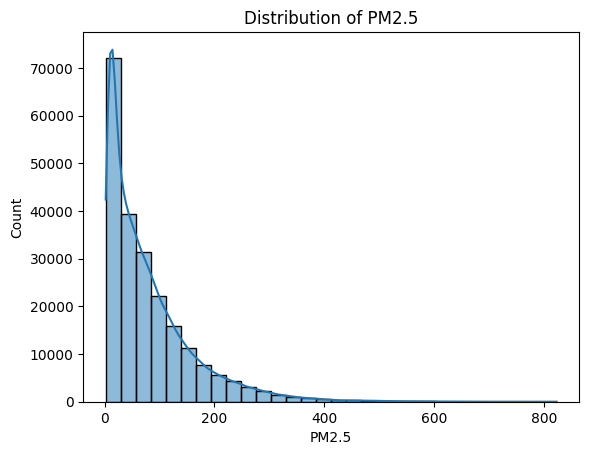

In [24]:
# Visualization: Histogram of a specific feature (e.g., PM2.5 levels)
sns.histplot(data['PM2.5'], bins=30, kde=True)
plt.title("Distribution of PM2.5")
plt.show()

# Visualization: Scatter Plot between PM2.5 and PM10

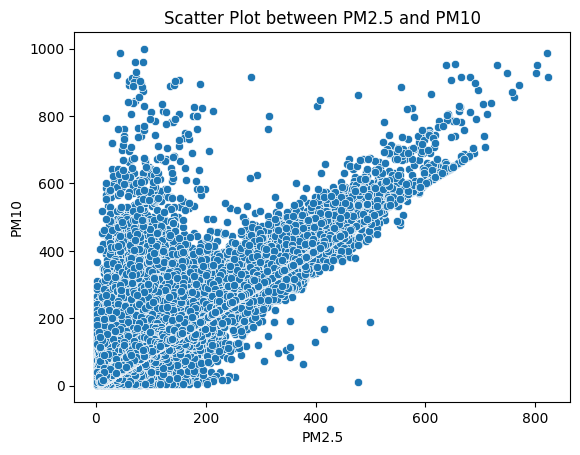

In [25]:
# Scatter plot between two variables
sns.scatterplot(x='PM2.5', y='PM10', data=data)
plt.title("Scatter Plot between PM2.5 and PM10")
plt.show()

# Visualization: Correlation Heatmap of Air Quality Data

In [26]:
# Load data
data = pd.read_csv("Processed_air_data.csv")

# Check data types
print(data.dtypes)

# Select only numeric columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Calculate correlation matrix
correlation_matrix = numeric_data.corr()

No           int64
year        object
month        int64
day          int64
hour         int64
PM2.5      float64
PM10       float64
SO2        float64
NO2        float64
CO         float64
O3         float64
TEMP       float64
PRES       float64
DEWP       float64
RAIN       float64
wd          object
WSPM       float64
station     object
dtype: object


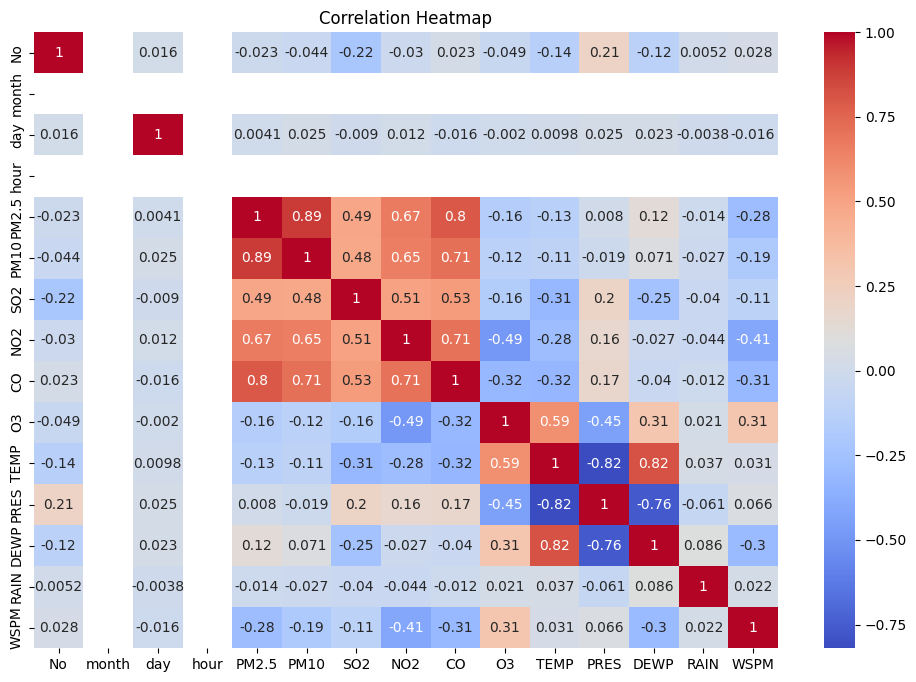

In [27]:
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# Data Preprocessing: Feature Selection, Train-Test Split, and Scaling

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Selecting features and target variable
features = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]  # Example features
target = data['TEMP']  # Example target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Feature and Target Selection**

In [29]:
# Selecting features and target variable
features = data[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3']]  # Example features
target = data['TEMP']  # Example target

# Confirm the shape of features and target
print("Features shape:", features.shape)
print("Target shape:", target.shape)


Features shape: (220346, 6)
Target shape: (220346,)


**Train-Test Split**

In [30]:
from sklearn.model_selection import train_test_split

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Confirm the shapes of the splits
print("Training set size:", X_train.shape, y_train.shape)
print("Testing set size:", X_test.shape, y_test.shape)


Training set size: (176276, 6) (176276,)
Testing set size: (44070, 6) (44070,)


**Feature Scaling**

In [31]:
from sklearn.preprocessing import StandardScaler

# Initializing the StandardScaler
scaler = StandardScaler()

# Scaling the training and testing feature sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Confirm scaling has been applied
print("Scaled training data (sample):\n", X_train_scaled[:5])
print("Scaled testing data (sample):\n", X_test_scaled[:5])


Scaled training data (sample):
 [[ 0.36637758  0.06279332 -0.64779324 -0.45513663 -0.11790246  0.58348533]
 [ 0.07046704 -0.19984724 -0.64779324  0.17150389  0.39954089 -0.96529235]
 [ 1.26643878  0.89448841  0.99700752 -0.30591643 -0.11790246  0.84748153]
 [-0.82959416  0.02996325 -0.64779324 -1.02480983 -0.89406749 -0.12050452]
 [-0.49669481 -0.70324164 -0.55259919 -0.48362029 -0.63534581  0.46028711]]
Scaled testing data (sample):
 [[-0.22544349 -0.45154444 -0.55259919 -0.93935885  0.14081921  0.84748153]
 [-0.29942112  0.27071709 -0.55259919 -0.17030003 -0.20414302 -0.87729362]
 [ 0.36637758  0.89448841  2.35081912  1.33933395  1.77938982 -0.9828921 ]
 [ 0.77325456  1.14618561  1.49407273  1.68113787 -0.11790246  0.65388432]
 [ 0.11978547 -0.11230039 -0.02903196  0.65572611  1.43442759 -0.9828921 ]]


# Model Training and Evaluation: Random Forest Regressor

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)

# Evaluate the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 40.02630219532618


# Task 4: Application development

In [33]:
# Load the cleaned data
data = pd.read_csv("Processed_air_data.csv")

# Define the features and target for modeling
features = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3"]
target = "TEMP"

# Train a simple model
X = data[features].fillna(0)  # Fill missing values for simplicity
y = data[target]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [34]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score # Import r2_score

# Load the cleaned data
data = pd.read_csv("/content/Processed_air_data.csv")

# Add polynomial features
data['PM2.5^2'] = data['PM2.5'] ** 2
data['PM10^2'] = data['PM10'] ** 2
features = ["PM2.5", "PM10", "SO2", "NO2", "CO", "O3", "PM2.5^2", "PM10^2"]
target = "TEMP"

# Handle missing values
X = data[features].fillna(data[features].mean())
y = data[target].fillna(data[target].mean())

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred) # Now r2_score is defined

print("Mean Squared Error (MSE):", mse)
print("R² Score (Accuracy):", r2)

Mean Squared Error (MSE): 40.03092864593991
R² Score (Accuracy): 0.6914262631102681
